In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/raw/customers.csv")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

y = df['Churn'].map({"Yes":1, "No":0})
X = df.drop(['Churn','customerID'], axis=1)

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_final = X.to_numpy()


In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_final)


In [4]:
df['Cluster'] = clusters


In [5]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_final)

df['PC1'] = pca_features[:,0]
df['PC2'] = pca_features[:,1]


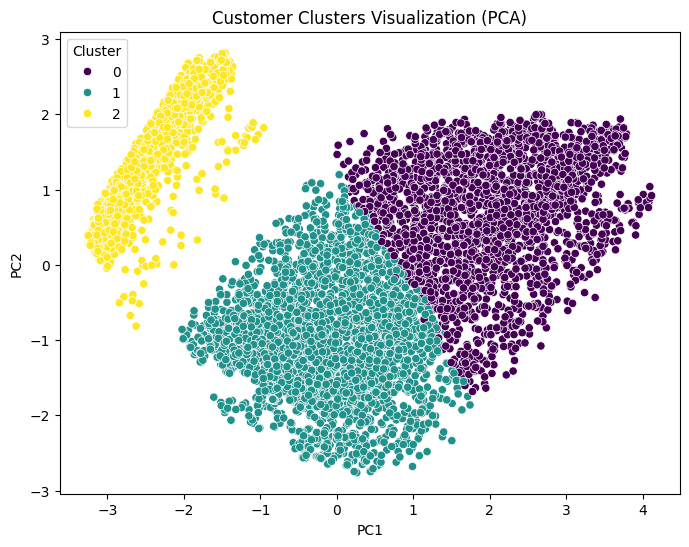

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis')
plt.title("Customer Clusters Visualization (PCA)")
plt.show()


In [7]:
df.groupby('Cluster')[['MonthlyCharges', 'TotalCharges', 'tenure']].mean()



,MonthlyCharges,TotalCharges,tenure
Cluster,,,
0,89.606137,5161.511461,57.802024
1,67.902281,1023.398775,15.410296
2,21.079194,668.099443,30.547182
